In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df.shape

(400, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [19]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [21]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

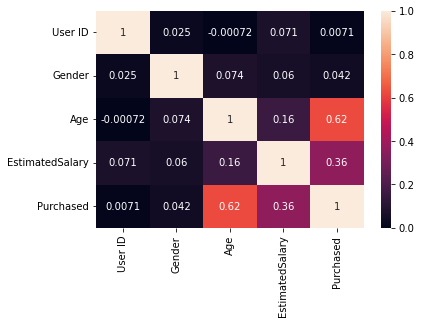

In [43]:
sns.heatmap(df.corr(),annot=True)

In [24]:
X = df.iloc[:,:4]


In [25]:
y = df.iloc[:,-1:]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
                                               
X_train.shape,X_test.shape 

((280, 4), (120, 4))

In [27]:
from  sklearn.preprocessing  import StandardScaler

In [28]:
ss = StandardScaler()

In [29]:
ss.fit(X_train)

StandardScaler()

In [30]:
x_train = ss.transform(X_train)
x_test  = ss.transform(X_test)

In [31]:
x_train

array([[ 1.67118864, -0.99288247, -1.1631724 , -1.5849703 ],
       [-1.38839503, -0.99288247,  2.17018137,  0.93098672],
       [-1.02465642,  1.00716855,  0.0133054 ,  1.22017719],
       ...,
       [-1.42070282, -0.99288247, -0.18277423, -0.51496559],
       [ 1.19726096,  1.00716855, -1.06513258, -0.45712749],
       [ 1.45653019,  1.00716855, -1.1631724 ,  1.39369146]])

In [32]:
x_test

array([[ 4.79637466e-01, -9.92882472e-01, -7.71013130e-01,
         4.97201030e-01],
       [-5.57552735e-01,  1.00716855e+00,  1.33054037e-02,
        -5.72803680e-01],
       [ 1.20428316e+00, -9.92882472e-01, -2.80814046e-01,
         1.50172476e-01],
       [ 6.60685627e-01,  1.00716855e+00, -7.71013130e-01,
         2.65848661e-01],
       [-7.61380571e-01,  1.00716855e+00, -2.80814046e-01,
        -5.72803680e-01],
       [ 1.73038182e+00, -9.92882472e-01, -1.06513258e+00,
        -1.44037507e+00],
       [-1.15585546e+00,  1.00716855e+00, -6.72973313e-01,
        -1.58497030e+00],
       [-1.58490761e-01, -9.92882472e-01, -1.82774230e-01,
         2.14558666e+00],
       [-3.63012323e-01,  1.00716855e+00, -1.94749093e+00,
        -5.22608478e-02],
       [-9.81178249e-01, -9.92882472e-01,  8.95663754e-01,
        -7.75237003e-01],
       [-3.33653583e-02, -9.92882472e-01, -7.71013130e-01,
        -6.01722726e-01],
       [ 1.53298156e+00,  1.00716855e+00, -9.67092763e-01,
      

In [33]:
x_train = pd.DataFrame(x_train, columns=X_train.columns)
x_test = pd.DataFrame(x_test, columns=X_test.columns)

In [34]:
x_train

,User ID,Gender,Age,EstimatedSalary
0,1.671189,-0.992882,-1.163172,-1.584970
1,-1.388395,-0.992882,2.170181,0.930987
2,-1.024656,1.007169,0.013305,1.220177
3,1.717767,-0.992882,0.209385,1.075582
4,1.535162,1.007169,0.405465,-0.486047
...,...,...,...,...
275,-1.023835,1.007169,0.993704,-1.151185
276,1.243033,-0.992882,-0.869053,-0.775237
277,-1.420703,-0.992882,-0.182774,-0.514966
278,1.197261,1.007169,-1.065133,-0.457127


In [35]:
x_test

,User ID,Gender,Age,EstimatedSalary
0,0.479637,-0.992882,-0.771013,0.497201
1,-0.557553,1.007169,0.013305,-0.572804
2,1.204283,-0.992882,-0.280814,0.150172
3,0.660686,1.007169,-0.771013,0.265849
4,-0.761381,1.007169,-0.280814,-0.572804
...,...,...,...,...
115,-0.789413,-0.992882,1.091743,-0.139018
116,1.747824,1.007169,0.699584,1.769639
117,1.444524,1.007169,-0.672973,0.555039
118,-1.046318,1.007169,0.797624,0.352606


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [39]:
predict = lr.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy = accuracy_score(y_test,predict)

In [42]:
accuracy

0.8833333333333333